# UTS - implementasi Latent Directlet allocation (LDA)

Nama : Arbil Shofiyurrahman

NIM  : 210411100016

Lakukan implementasi lda pada data abstrack:

dengan k=3  alhpa=0.1 beta=0.2

library di scikit-learn

doc_topic_prior float, default=None

Prior of document topic distribution theta. If the value is None, defaults to 1 / n_components.

In [1], this is called alpha.

topic_word_priorfloat, default=None

Prior of topic word distribution beta. If the value is None, defaults to 1 / n_components. In [1], this is called eta.

output adalah :

- proporsi topik pada dokumen

- distribusi kata pada topik

In [ ]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_tf = pd.read_excel("/content/drive/MyDrive/ppw/tugas/tugas-ppw/df_tf.xlsx")
df_tf

,aalysis,aam,abad,abadi,ability,abjad,absensi,absolut,absolute,abstract,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ppw/tugas/tugas-ppw/DF_PTA1.xlsx')
df['Label']

FileNotFoundError: ignored

## Menggunakan Data TF - IDF tanpa menggunakan LDA

In [ ]:
df_combined = pd.concat([df_tf, df['Label']], axis=1)

print(df_combined)

     aalysis  aam  abad  abadi  ability  abjad  absensi  absolut  absolute  \
0          0    0     0      0        0      0        0        0         0   
1          0    0     0      0        0      0        0        0         0   
2          0    0     0      0        0      0        0        0         0   
3          0    0     0      0        0      0        0        0         0   
4          0    0     0      0        0      0        0        0         0   
..       ...  ...   ...    ...      ...    ...      ...      ...       ...   
853        0    0     0      0        0      0        0        0         0   
854        0    0     0      0        0      0        0        0         0   
855        0    0     0      0        0      0        0        0         0   
856        0    0     0      0        0      0        0        0         0   
857        0    0     0      0        0      0        0        0         0   

     abstract  ...  zat  zcz  zf  zona  zone  zoning  zoom  zuc

In [ ]:
df_combined = df_combined.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Pisahkan fitur dan label dari DataFrame yang telah digabungkan
X = df_combined.drop(columns=['Label']).values
y = df_combined['Label'].values

# Pembagian data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
model = MultinomialNB()

# Pelatihan model Naive Bayes dengan data pelatihan
model.fit(X_train, y_train)

# Prediksi label kelas pada data pengujian
y_pred = model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 64.81%


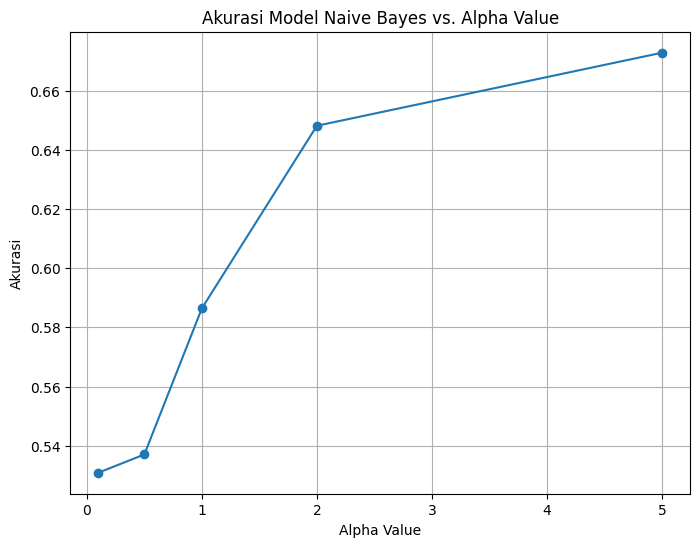

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# List untuk menyimpan akurasi pada setiap iterasi
accuracies = []

# Range nilai alpha yang akan diuji
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# Lakukan pelatihan dan evaluasi model untuk setiap alpha
for alpha in alpha_values:
    # Pembagian data menjadi data pelatihan dan data pengujian
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

    # Inisialisasi model Naive Bayes dengan alpha tertentu
    model = MultinomialNB(alpha=alpha)

    # Pelatihan model Naive Bayes dengan data pelatihan
    model.fit(X_train, y_train)

    # Prediksi label kelas pada data pengujian
    y_pred = model.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Visualisasi akurasi menggunakan grafik matplotlib
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, accuracies, marker='o')
plt.xlabel('Alpha Value')
plt.ylabel('Akurasi')
plt.title('Akurasi Model Naive Bayes vs. Alpha Value')
plt.grid(True)
plt.show()

## TOPIK 1 - 50

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

lda_results = []

for n in range(1, 51):
    lda = LatentDirichletAllocation(n_components=n, doc_topic_prior=0.2, topic_word_prior=0.1, random_state=42, max_iter=1)
    lda_top = lda.fit_transform(df_tf)
    lda_results.append(lda_top)

In [ ]:
n_components = 50
column_names = [f'Topik {i+1}' for i in range(n_components)]
topik50 = pd.DataFrame(lda_top, columns=column_names)

In [ ]:
topik50

,Topik 1,Topik 2,Topik 3,Topik 4,Topik 5,Topik 6,Topik 7,Topik 8,Topik 9,Topik 10,...,Topik 41,Topik 42,Topik 43,Topik 44,Topik 45,Topik 46,Topik 47,Topik 48,Topik 49,Topik 50
0,0.002104,0.002097,0.002095,0.002112,0.002106,0.002105,0.002098,0.002096,0.002099,0.002093,...,0.002095,0.002091,0.002104,0.002100,0.002112,0.002093,0.002091,0.002097,0.002090,0.002108
1,0.001653,0.001652,0.001646,0.001659,0.001651,0.001650,0.001647,0.001647,0.001649,0.001649,...,0.001656,0.001644,0.001658,0.001650,0.001652,0.001647,0.001647,0.001649,0.001645,0.001678
2,0.001582,0.001584,0.001586,0.001597,0.001586,0.001586,0.001581,0.001591,0.001587,0.001582,...,0.001580,0.001580,0.001590,0.001586,0.001591,0.001584,0.001582,0.001582,0.001578,0.001585
3,0.002420,0.002410,0.002409,0.618759,0.002425,0.002429,0.002416,0.002421,0.002425,0.002419,...,0.002424,0.002413,0.002425,0.002433,0.002421,0.002410,0.002424,0.002429,0.002399,0.002418
4,0.002100,0.002094,0.002089,0.002124,0.002100,0.002138,0.002093,0.002111,0.002107,0.002097,...,0.002101,0.002097,0.002115,0.002114,0.002113,0.002108,0.002090,0.002094,0.002088,0.897072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0.001529,0.001511,0.001510,0.001525,0.001515,0.001527,0.001502,0.001520,0.001516,0.001509,...,0.848430,0.001506,0.001535,0.001527,0.001535,0.001523,0.001506,0.001516,0.001509,0.001539
854,0.002083,0.002087,0.002074,0.002088,0.002092,0.002088,0.002072,0.002092,0.002078,0.002075,...,0.002080,0.002071,0.002089,0.002084,0.002087,0.002078,0.002072,0.002078,0.002072,0.002086
855,0.001199,0.001193,0.001180,0.001194,0.001180,0.941820,0.001176,0.001201,0.001182,0.001179,...,0.001184,0.001183,0.001196,0.001195,0.001192,0.001202,0.001177,0.001181,0.001182,0.001193
856,0.001419,0.001423,0.001405,0.001429,0.001412,0.001434,0.001406,0.001418,0.001412,0.001408,...,0.001408,0.001407,0.001422,0.001413,0.001417,0.001419,0.001405,0.001409,0.001409,0.001417


In [ ]:
df_gabungan = pd.concat([topik50, df['Label']], axis=1)

print(df_gabungan)

      Topik 1   Topik 2   Topik 3   Topik 4   Topik 5   Topik 6   Topik 7  \
0    0.002104  0.002097  0.002095  0.002112  0.002106  0.002105  0.002098   
1    0.001653  0.001652  0.001646  0.001659  0.001651  0.001650  0.001647   
2    0.001582  0.001584  0.001586  0.001597  0.001586  0.001586  0.001581   
3    0.002420  0.002410  0.002409  0.618759  0.002425  0.002429  0.002416   
4    0.002100  0.002094  0.002089  0.002124  0.002100  0.002138  0.002093   
..        ...       ...       ...       ...       ...       ...       ...   
853  0.001529  0.001511  0.001510  0.001525  0.001515  0.001527  0.001502   
854  0.002083  0.002087  0.002074  0.002088  0.002092  0.002088  0.002072   
855  0.001199  0.001193  0.001180  0.001194  0.001180  0.941820  0.001176   
856  0.001419  0.001423  0.001405  0.001429  0.001412  0.001434  0.001406   
857  0.002028  0.002026  0.002002  0.002040  0.002016  0.234544  0.001999   

      Topik 8   Topik 9  Topik 10  ...  Topik 42  Topik 43  Topik 44  \
0  

In [ ]:
df_gabungan = df_gabungan.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Pisahkan fitur dan label dari DataFrame yang telah digabungkan
X = df_gabungan.drop(columns=['Label']).values
y = df_gabungan['Label'].values

# Pembagian data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes
model = MultinomialNB()

# Pelatihan model Naive Bayes dengan data pelatihan
model.fit(X_train, y_train)

# Prediksi label kelas pada data pengujian
y_pred = model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 71.60%


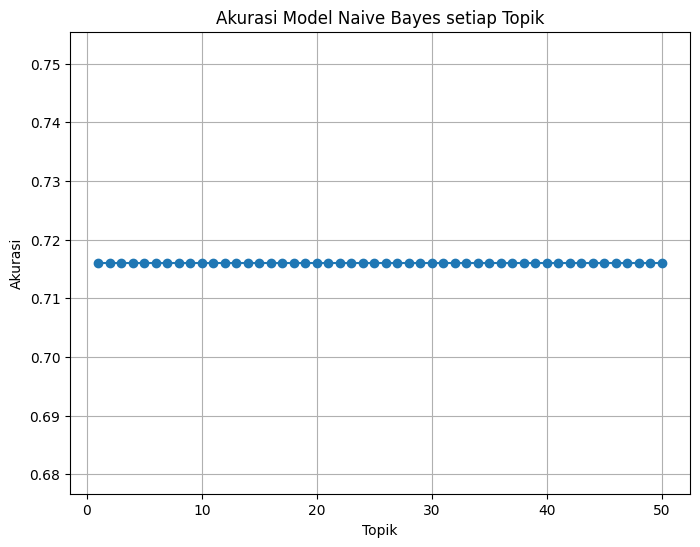

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# List untuk menyimpan akurasi pada setiap iterasi
accuracies = []

# Range nilai alpha yang akan diuji (dari 1 hingga 50)
alpha_values = list(range(1, 51))

# Lakukan pelatihan dan evaluasi model untuk setiap alpha
for alpha in alpha_values:
    # Pembagian data menjadi data pelatihan dan data pengujian
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inisialisasi model Naive Bayes dengan alpha tertentu
    model = MultinomialNB(alpha=alpha)

    # Pelatihan model Naive Bayes dengan data pelatihan
    model.fit(X_train, y_train)

    # Prediksi label kelas pada data pengujian
    y_pred = model.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Visualisasi akurasi menggunakan grafik matplotlib
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, accuracies, marker='o')
plt.xlabel('Topik')
plt.ylabel('Akurasi')
plt.title('Akurasi Model Naive Bayes setiap Topik')
plt.grid(True)
plt.show()

In [ ]:
df_combined = pd.concat([df_tf, df['Label']], axis=1)

print(df_combined)

     aalysis  aam  abad  abadi  ability  abjad  absensi  absolut  absolute  \
0          0    0     0      0        0      0        0        0         0   
1          0    0     0      0        0      0        0        0         0   
2          0    0     0      0        0      0        0        0         0   
3          0    0     0      0        0      0        0        0         0   
4          0    0     0      0        0      0        0        0         0   
..       ...  ...   ...    ...      ...    ...      ...      ...       ...   
853        0    0     0      0        0      0        0        0         0   
854        0    0     0      0        0      0        0        0         0   
855        0    0     0      0        0      0        0        0         0   
856        0    0     0      0        0      0        0        0         0   
857        0    0     0      0        0      0        0        0         0   

     abstract  ...  zat  zcz  zf  zona  zone  zoning  zoom  zuc

## Kesimpulan

Dari setiap komponen 1 - 50

ditemukan bahwa tidak ada perubahan pada nilai akurasi, yaitu sebesar 71,60%

Dan LDA dapat meningkatkan akurasi, dengan melakukan reduksi dimensi pada fitur